<a href="https://colab.research.google.com/github/choprahetarth/gearbox-fault-prediction/blob/main/Gearbox_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previous Rendition

In [ ]:
#!pip install vaex==2.5.0 --quiet
!pip install vaex 
#requests = "^2.23.0"
#!pip install --upgrade vaex --quiet
#!pip install ipython==7.25.0
!pip install ipython==7.0.0 

#!pip install ipython==5.5.0 --quiet

#!pip install ipython -U -q

In [ ]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import vaex

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/GearboxProject/PHM09_competition_1')

In [ ]:
%%time
vaex_df = vaex.from_csv('Run_10.csv', convert=True, chunk_size=5000
                        ,names=["input_Voltage","output_Voltage","RPM"])

CPU times: user 575 ms, sys: 55.4 ms, total: 630 ms
Wall time: 652 ms


In [ ]:
vaex_df

#,input_Voltage,output_Voltage,RPM
0,0.03952,-0.0038147,4.9329
1,0.033417,-0.0018311,4.9304
2,0.029907,0.006713899999999999,4.928
3,0.030364999999999996,0.012665000000000001,4.9304
4,0.033722,0.012206999999999999,4.9219
...,...,...,...
"133,323",-0.050506999999999996,-0.032043,4.9097
"133,324",-0.041656,-0.030975,4.9182
"133,325",-0.030212,-0.029449,4.9109
"133,326",-0.019531,-0.021973,4.9243


In [ ]:
vaex_df.input_Voltage.value_counts()

 0.024261    514
 0.024872    435
 0.021210    433
 0.020447    431
 0.019989    427
            ... 
 0.110470      1
 0.110930      1
 0.111690      1
 0.111850      1
-0.096283      1
Length: 1332, dtype: int64

In [ ]:
vaex_df.describe()

,input_Voltage,output_Voltage,RPM
data_type,float64,float64,float64
count,133328,133328,133328
NA,0,0,0
mean,0.02152790134135276,0.0006651127457098245,2.389053887496974
std,0.0256943,0.0156494,2.42737
min,-0.096283,-0.066376,-0.60547
max,0.13336,0.06897,4.9536


In [ ]:
vaex_df.input_Voltage.value_counts()

 0.024261    514
 0.024872    435
 0.021210    433
 0.020447    431
 0.019989    427
            ... 
 0.110470      1
 0.110930      1
 0.111690      1
 0.111850      1
-0.096283      1
Length: 1332, dtype: int64

/usr/local/lib/python3.7/dist-packages/vaex/viz/mpl.py:46: UserWarning: `plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.
  warnings.warn('`plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.')


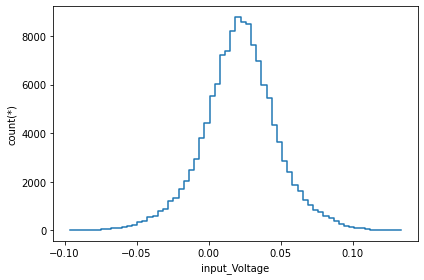

In [ ]:
vaex_df.plot1d(vaex_df.input_Voltage);

/usr/local/lib/python3.7/dist-packages/vaex/viz/mpl.py:311: UserWarning: `plot` is deprecated and it will be removed in version 5.x. Please `df.viz.heatmap` instead.
  warnings.warn('`plot` is deprecated and it will be removed in version 5.x. Please `df.viz.heatmap` instead.')


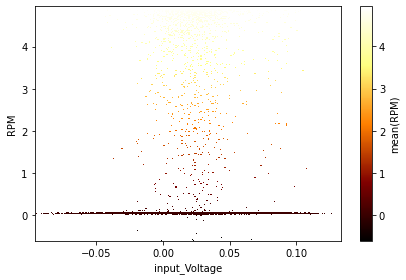

In [ ]:
vaex_df.plot(vaex_df.input_Voltage, 
             vaex_df.RPM, 
             what=vaex.stat.mean(vaex_df.RPM))

In [ ]:
# TO DO 
#plt.plot(vaex_df.input_Voltage)

In [ ]:
#vaex_df

#vaex_df.shape
#len(vaex_df)
vaex_df
#train = df[msk]
#test = df[~msk]

#train = train.reset_index(drop=True)
#test = test.reset_index(drop=True)

#,input_Voltage,output_Voltage,RPM
0,0.03952,-0.0038147,4.9329
1,0.033417,-0.0018311,4.9304
2,0.029907,0.006713899999999999,4.928
3,0.030364999999999996,0.012665000000000001,4.9304
4,0.033722,0.012206999999999999,4.9219
...,...,...,...
"133,323",-0.050506999999999996,-0.032043,4.9097
"133,324",-0.041656,-0.030975,4.9182
"133,325",-0.030212,-0.029449,4.9109
"133,326",-0.019531,-0.021973,4.9243


# Regression -> Features

In [ ]:
import lightgbm
import vaex.ml.sklearn

In [ ]:
# Features on which to train the model
train_features = ['input_Voltage',	'output_Voltage']
train_labels = 'RPM'
# Features on which to train the model
test_features = ['input_Voltage','output_Voltage']
test_labels = 'RPM'

In [ ]:
# Feature Normalization
scaler = vaex.ml.StandardScaler(features=train_features, prefix='scaled_')
scaler.fit(vaex_df)
df_trans = scaler.transform(vaex_df)
df_trans

#,input_Voltage,output_Voltage,RPM,scaled_input_Voltage,scaled_output_Voltage
0,0.03952,-0.0038147,4.9329,0.70023764784573,-0.28626090924157843
1,0.033417,-0.0018311,4.9304,0.4627139189088178,-0.15950848189617542
2,0.029907,0.006713899999999999,4.928,0.32610761240897135,0.38651868671970924
3,0.030364999999999996,0.012665000000000001,4.9304,0.3439325948525409,0.7667951388145007
4,0.033722,0.012206999999999999,4.9219,0.47458426747931726,0.7375288493790324
...,...,...,...,...,...
"133,323",-0.050506999999999996,-0.032043,4.9097,-2.8035389775849437,-2.0900547914931615
"133,324",-0.041656,-0.030975,4.9182,-2.459065353986613,-2.021809382940585
"133,325",-0.030212,-0.029449,4.9109,-2.013674307951217,-1.9242976849525408
"133,326",-0.019531,-0.021973,4.9243,-1.59797859292989,-1.4465798250845066


In [ ]:
train_features = ['scaled_input_Voltage',	'scaled_output_Voltage']
train_labels = 'RPM'

In [ ]:
df_train, df_test = df_trans.ml.train_test_split(test_size=0.2)

/usr/local/lib/python3.7/dist-packages/vaex/ml/__init__.py:31: UserWarning: Make sure the DataFrame is shuffled
  warnings.warn('Make sure the DataFrame is shuffled')


In [ ]:
print(df_train.shape)
print(df_test.shape)
print(df_test.shape[0]+df_train.shape[0])
print(vaex_df.shape[0])
print((df_test.shape[0])/(df_train.shape[0]))

(106662, 5)
(26666, 5)
133328
133328
0.2500046877050871


In [ ]:
# Instantiate the LightGBM Classifier
booster = lightgbm.sklearn.LGBMRegressor(num_leaves=10,
                                          max_depth=10,
                                          n_estimators=100,
                                          random_state=42)

# Make it a vaex transformer (for the automagic pipeline and lazy predictions)
model = vaex.ml.sklearn.Predictor(features=train_features,
                                  target=train_labels,
                                  model=booster,
                                  prediction_name='prediction')

# Train and predict
model.fit(df=df_train)
df_train = model.transform(df=df_train)

df_train

#,input_Voltage,output_Voltage,RPM,scaled_input_Voltage,scaled_output_Voltage,prediction
0,0.008392299999999998,-0.044556,0.039063,-0.5112267757540612,-2.8896379349560712,2.2133706862748337
1,0.0038147,-0.041656,0.041504,-0.6893831941682196,-2.7043273686616227,2.2044639286225745
2,-0.0019836,-0.036469,0.045166000000000005,-0.9150482502873247,-2.372877055775655,2.624124281943529
3,-0.005188,-0.026855,0.043945,-1.039760856711287,-1.7585405784119201,2.303114784569825
4,-0.0050354,-0.017547999999999998,0.052489999999999995,-1.0338217905084732,-1.163821460997287,2.195286922060696
...,...,...,...,...,...,...
"106,657",-0.050506999999999996,-0.032043,4.9097,-2.8035389775849437,-2.0900547914931615,2.836774497977038
"106,658",-0.041656,-0.030975,4.9182,-2.459065353986613,-2.021809382940585,2.6851196643122734
"106,659",-0.030212,-0.029449,4.9109,-2.013674307951217,-1.9242976849525408,2.3755304475072667
"106,660",-0.019531,-0.021973,4.9243,-1.59797859292989,-1.4465798250845066,2.151462301804562


In [ ]:
import vaex.ml.tensorflow
import tensorflow.keras as K
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
#from keras.optimizers import SGD

df = vaex_df
#df = vaex.example()
#df_train, df_valid, df_test = df.split_random([0.8, 0.1, 0.1], random_state=42)
df_train, df_valid, df_test = df.split([0.8, 0.1, 0.1])


features = ['input_Voltage',	'output_Voltage']
target = 'RPM'

# Scaling the features
df_train = df_train.ml.minmax_scaler(features=features)
features = df_train.get_column_names(regex='^minmax_')

# Apply preprocessing to the validation
state_prep = df_train.state_get()
df_valid.state_set(state_prep)

# Generators for the train and validation sets
gen_train = df_train.ml.tensorflow.to_keras_generator(features=features, target=target, batch_size=512)
gen_valid = df_valid.ml.tensorflow.to_keras_generator(features=features, target=target, batch_size=512)

# Create and fit a simple Sequential Keras model
'''nn_model = K.Sequential()
nn_model.add(K.layers.Dense(1024, activation='elu'))
nn_model.add(K.layers.Dense(512, activation='relu'))
nn_model.add(K.layers.Dense(256, activation='swish'))
nn_model.add(K.layers.Dense(64, activation='relu'))
nn_model.add(K.layers.Dense(16, activation='swish'))
nn_model.add(K.layers.Dense(8, activation='relu'))
nn_model.add(K.layers.Dense(1, activation='linear'))
nn_model.compile(optimizer='adam', loss='mse')
nn_model.fit(x=gen_train, validation_data=gen_valid, epochs=25, steps_per_epoch=516, validation_steps=65)'''



# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
#regressor.add(LSTM(units=50, return_sequences=True, input_shape=(features.shape[1],1)))
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(df_train.shape[1],1)))

regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')

# Serialize the model
keras_model = vaex.ml.tensorflow.KerasModel(features=features, prediction_name='keras_pred', model=regressor)
df_train = keras_model.transform(df_train)

# Apply all the transformations to the test set
state = df_train.state_get()
df_test.state_set(state)

# Preview the results
df_test.head(5)

Recommended "steps_per_epoch" arg: 209.0
Recommended "steps_per_epoch" arg: 27.0
106662 1


"\n# The LSTM architecture\nregressor = Sequential()\n# First LSTM layer with Dropout regularisation\n#regressor.add(LSTM(units=50, return_sequences=True, input_shape=(features.shape[1],1)))\nregressor.add(LSTM(units=50, return_sequences=True, input_shape=(df_train.shape[1],1)))\n\nregressor.add(Dropout(0.2))\n# Second LSTM layer\nregressor.add(LSTM(units=50, return_sequences=True))\nregressor.add(Dropout(0.2))\n# Third LSTM layer\nregressor.add(LSTM(units=50, return_sequences=True))\nregressor.add(Dropout(0.2))\n# Fourth LSTM layer\nregressor.add(LSTM(units=50))\nregressor.add(Dropout(0.2))\n# The output layer\nregressor.add(Dense(units=1))\n\n# Compiling the RNN\nregressor.compile(optimizer='rmsprop',loss='mean_squared_error')\n\n# Serialize the model\nkeras_model = vaex.ml.tensorflow.KerasModel(features=features, prediction_name='keras_pred', model=regressor)\ndf_train = keras_model.transform(df_train)\n\n# Apply all the transformations to the test set\nstate = df_train.state_get()\

# CNN based spectrogram classification

## Data reading and spectrogram generation

In [17]:
import os 
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from tqdm.notebook import tqdm
import cv2 
rcParams['figure.figsize'] = 50, 30

In [3]:
BASELINE = "/content/drive/MyDrive/Colab Notebooks/GearboxProject/pre_labelled/Spur Gearbox"
SPURS = ['spur 1', 'spur 2', 'spur 3', 'spur 3', 'spur 4','spur 5', 'spur 6', 'spur 7','spur 8']
# SPURS = ['spur 4','spur 5', 'spur 6', 'spur 7','spur 8']


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

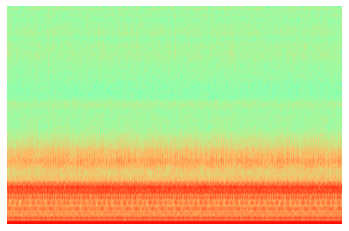

In [5]:
for i in tqdm(SPURS):
  PATH = BASELINE+"/"+i
  os.chdir(PATH)
  file_names = os.listdir()
  if not os.path.exists('images'):
    os.makedirs('images')
  for j in tqdm(file_names):
    data = pd.read_csv(j,delim_whitespace=True, engine='python',header = None)
    accel_normal = data.iloc[:,[0]]
    accel_normal = accel_normal.to_numpy().flatten()
    plt.specgram(accel_normal, Fs=1, cmap="rainbow")
    plt.axis('off')
    plt.savefig('images/'+j+'_plot.png', dpi=300, bbox_inches='tight')

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/GearboxProject/pre_labelled/Spur Gearbox/spur 3')

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/GearboxProject/pre_labelled/Spur Gearbox')

In [ ]:
os.listdir()[0]

In [ ]:
# spur_1 = pd.read_csv(os.listdir()[0],sep='"\s"|   ', engine='python',header = None)
spur_1 = pd.read_csv(os.listdir()[0],delim_whitespace=True, engine='python',header = None)

In [ ]:
spur_1

In [ ]:
accel_normal = spur_1.iloc[:,[0]]
tacho = spur_1.iloc[:,[2]]

In [ ]:
accel_normal = accel_normal.to_numpy().flatten()
tacho  = tacho.to_numpy().flatten()

In [ ]:
plt.plot(accel_normal)
plt.axis('off')
# plt.savefig('plot.png', dpi=300, bbox_inches='tight')
# plt.plot(tacho)

In [ ]:
plt.specgram(accel_normal, Fs=1, cmap="rainbow")

## CNN classificaton

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2
from tqdm.notebook import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
import pickle
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from numpy import array
from numpy import argmax
from tensorflow.keras.utils import to_categorical

In [2]:
#data loading 
BASELINE = "/content/drive/MyDrive/Colab Notebooks/GearboxProject/pre_labelled/Spur Gearbox"
SPURS = ['spur 1', 'spur 2', 'spur 3', 'spur 3', 'spur 4','spur 5', 'spur 6', 'spur 7','spur 8']

In [3]:
training_data = []
CLASS_NAME = 0
IMG_SIZE = 224 
for i in tqdm(SPURS):
  PATH = os.path.join(BASELINE,i+"/images")
  CLASS_NAME +=1
  for img in tqdm(os.listdir(PATH)):
    try:
      img_array = cv2.imread(os.path.join(PATH,img))
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      training_data.append([new_array, CLASS_NAME])
    except Exception as e:
      pass

del img_array
del new_array

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [4]:
# USED TO RESHUFFLE THE DATA BECAAUSE WE NEED TO REMOVE BIAS FROM NN
print(len(training_data))
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

x = []
y = []

# MAKE X AND Y REPRESENTING FEATURES AND LABELS RESPECTIVELY
for features,label in training_data:
    x.append(features)
    y.append(label)

del features
del label
del training_data

180
4
2
1
4
4
2
2
5
4
9


In [5]:
X_train, X_test, y_train, y_test  = train_test_split(x, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [6]:
del x
del y

In [7]:
H = X_train[0].shape[0]
W = X_train[0].shape[1]

In [8]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)
# y = y.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_val = y_val.reshape(-1,1)

In [9]:
# print(x[1].shape)
print(X_train[1].shape)
print(X_test[1].shape)
print(X_val[1].shape)
# print(y[1].shape)
print(y_train[1].shape)
print(y_test[1].shape)
print(y_val[1].shape)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(1,)
(1,)
(1,)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


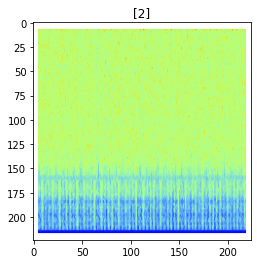

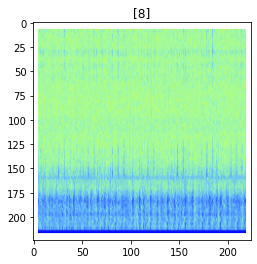

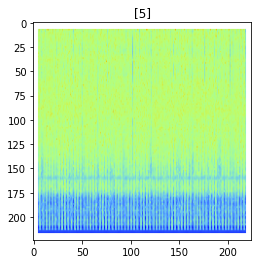

In [10]:
for index,i in enumerate(X_train[:3]):
  plt.figure()
  plt.imshow(i)
  plt.title(y_train[index])

In [11]:
# IMG_SIZE=100 #reshape the pic
# RESHAPE THE IMAGE ACCRODING TO YOUR GIVEN IMAGE SIZE
#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

# RESHAPE THE DATA ACCORDING TO THE FORMAT
# X = np.array(x).reshape(-1, H, W, 3)
# X = X /255.0
X_train = np.array(X_train).reshape(-1, H, W, 3)
X_train = X_train/255.0
X_test = np.array(X_test).reshape(-1, H, W, 3)
X_test = X_test/255.0
X_val = np.array(X_val).reshape(-1, H, W, 3)
X_val = X_val/255.0

In [12]:
# print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
# print(y.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(108, 224, 224, 3)
(36, 224, 224, 3)
(36, 224, 224, 3)
(108, 1)
(36, 1)
(36, 1)


In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)


print(y_train[:3])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [14]:
IMG_SHAPE = (H, W, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


In [15]:
base_model.trainable = True

In [16]:
test_batch = base_model(X_test)
feature_batch = base_model(X_train)
val_batch = base_model(X_val)

In [17]:
print(feature_batch.shape)
print(test_batch.shape)
print(val_batch.shape)

(108, 7, 7, 1280)
(36, 7, 7, 1280)
(36, 7, 7, 1280)


In [32]:
global_average_layer = tf.keras.layers.GlobalMaxPooling2D()
prediction_layer_1 = tf.keras.layers.Dense(30, activation = "relu")
prediction_layer = tf.keras.layers.Dense(y_train.shape[1], activation = "softmax")

In [33]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  # tf.keras.layers.Dropout(0.2),
  prediction_layer_1,
  # tf.keras.layers.Dropout(0.2),
  prediction_layer,  
])

In [34]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['categorical_accuracy'])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                38430     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
Total params: 2,296,724
Trainable params: 2,262,612
Non-trainable params: 34,112
_________________________________________________________________


In [36]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

In [37]:
initial_epochs = 100

In [39]:
validation_steps = 36
loss0,accuracy0 = model.evaluate(X_val, y_val, steps = validation_steps)

36/36 [==============================] - 0s 11ms/step - loss: 10.4683 - categorical_accuracy: 0.0833


In [40]:
history = model.fit(X_train, y_train,
                    epochs=initial_epochs,
                    validation_data=(X_val, y_val),
                    shuffle=True)

Epoch 1/100
4/4 [==============================] - 7s 658ms/step - loss: 3.3189 - categorical_accuracy: 0.5185 - val_loss: 5.2611 - val_categorical_accuracy: 0.1944
Epoch 2/100
4/4 [==============================] - 1s 340ms/step - loss: 1.0401 - categorical_accuracy: 0.7963 - val_loss: 5.0800 - val_categorical_accuracy: 0.1944
Epoch 3/100
4/4 [==============================] - 1s 338ms/step - loss: 0.7129 - categorical_accuracy: 0.8056 - val_loss: 4.5968 - val_categorical_accuracy: 0.2500
Epoch 4/100
4/4 [==============================] - 1s 326ms/step - loss: 0.5288 - categorical_accuracy: 0.8333 - val_loss: 5.6580 - val_categorical_accuracy: 0.1944
Epoch 5/100
4/4 [==============================] - 1s 344ms/step - loss: 0.6881 - categorical_accuracy: 0.8056 - val_loss: 5.3845 - val_categorical_accuracy: 0.2222
Epoch 6/100
4/4 [==============================] - 1s 326ms/step - loss: 0.4028 - categorical_accuracy: 0.8426 - val_loss: 5.3142 - val_categorical_accuracy: 0.1111
Epoch 7/10

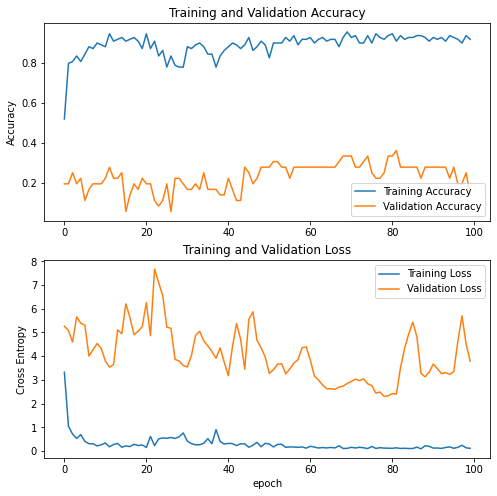

In [41]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [42]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

Evaluate on test data
2/2 [==============================] - 0s 26ms/step - loss: 6.1715 - categorical_accuracy: 0.1389
test loss, test acc: [6.171504974365234, 0.1388888955116272]


[[7.4070914e-07 8.4863834e-02 1.3305411e-05 7.0405292e-04 2.8546916e-05
  9.2582770e-02 1.6430283e-01 1.1209479e-06 1.3596934e-02 6.4390588e-01]]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


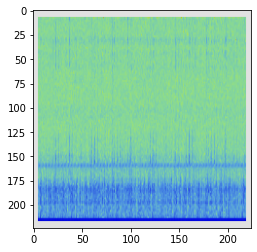

In [43]:
imgID = 11
pp = model.predict(X_test[imgID].reshape(1,H,W,3))

print(pp)
plt.imshow((X_test[imgID]*225).astype('int32'))
print(y_test[imgID])